In [18]:
import os
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [2]:
# Download data and unzip
current_dir = os.getcwd()
data_dir = "./data"
zip = os.path.join(data_dir, "playground-series-s4e9.zip")

if not os.path.exists(data_dir):
    os.mkdir("./data")
    os.system(
        f"kaggle competitions download -c playground-series-s4e9 -p {data_dir}"
    )
    with zipfile.ZipFile(zip) as zip_ref:
        zip_ref.extractall(data_dir)
    os.remove(zip)

In [71]:
data_train = pd.read_csv(os.path.join("data", "train.csv"))
data_test = pd.read_csv(os.path.join("data", "test.csv"))
sample_submission = pd.read_csv(os.path.join("data", "sample_submission.csv"))

# Exploratory Data Analysis

- brand -> target encoding with mean price across brand
- fuel_type one hot encode
- engine information col

- ext_col ignore for now
- int_col ignore for now

- accident col one hot encode
- clean_title col one hot encode
- remove any NaNs at the end

In [72]:
display(data_train)

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188528,188528,Cadillac,Escalade ESV Platinum,2017,49000,Gasoline,420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,White,Beige,None reported,Yes,27500
188529,188529,Mercedes-Benz,AMG C 43 AMG C 43 4MATIC,2018,28600,Gasoline,385.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,White,Black,At least 1 accident or damage reported,Yes,30000
188530,188530,Mercedes-Benz,AMG GLC 63 Base 4MATIC,2021,13650,Gasoline,469.0HP 4.0L 8 Cylinder Engine Gasoline Fuel,7-Speed A/T,White,Black,None reported,Yes,86900
188531,188531,Audi,S5 3.0T Prestige,2022,13895,Gasoline,3.0L,1-Speed Automatic,Daytona Gray Pearl Effect,Black,None reported,NaN,84900


In [97]:
for i in data_train.model.value_counts():
    print(i)

2945
2229
1709
1622
1526
1410
1357
1249
1219
1184
1148
1124
1111
1091
1081
1027
1001
994
893
847
846
831
821
813
798
782
769
751
740
735
724
716
698
697
676
676
673
660
631
614
606
590
589
578
571
564
562
561
556
556
554
547
538
532
522
521
520
509
509
508
505
494
488
472
465
457
456
453
451
451
449
449
433
432
428
423
416
416
411
403
401
398
397
397
396
385
383
382
381
380
380
379
377
375
373
365
365
362
360
360
352
351
351
349
347
343
342
339
338
336
334
333
333
331
331
329
327
321
321
320
318
315
313
311
311
309
304
301
300
300
299
298
297
295
294
291
290
286
283
282
282
280
279
278
277
274
273
270
268
268
268
268
267
266
266
265
265
264
262
261
257
256
255
254
254
251
251
249
249
248
247
242
240
239
237
237
236
235
235
233
232
232
231
231
231
230
229
228
228
227
227
227
227
226
224
224
224
223
222
220
219
217
217
216
214
214
214
213
212
212
211
211
211
211
210
208
208
208
205
205
205
205
205
204
203
203
203
203
202
202
202
201
200
200
200
199
197
196
196
195
195
194
194
191
191
190

In [92]:
for i in pd.get_dummies(data_train).columns:
    print(i)

id
model_year
milage
price
brand_Acura
brand_Alfa
brand_Aston
brand_Audi
brand_BMW
brand_Bentley
brand_Bugatti
brand_Buick
brand_Cadillac
brand_Chevrolet
brand_Chrysler
brand_Dodge
brand_FIAT
brand_Ferrari
brand_Ford
brand_GMC
brand_Genesis
brand_Honda
brand_Hummer
brand_Hyundai
brand_INFINITI
brand_Jaguar
brand_Jeep
brand_Karma
brand_Kia
brand_Lamborghini
brand_Land
brand_Lexus
brand_Lincoln
brand_Lotus
brand_Lucid
brand_MINI
brand_Maserati
brand_Maybach
brand_Mazda
brand_McLaren
brand_Mercedes-Benz
brand_Mercury
brand_Mitsubishi
brand_Nissan
brand_Plymouth
brand_Polestar
brand_Pontiac
brand_Porsche
brand_RAM
brand_Rivian
brand_Rolls-Royce
brand_Saab
brand_Saturn
brand_Scion
brand_Subaru
brand_Suzuki
brand_Tesla
brand_Toyota
brand_Volkswagen
brand_Volvo
brand_smart
model_124 Spider Abarth
model_128 i
model_135 i
model_135 is
model_1500 Big Horn
model_1500 Cheyenne
model_1500 Cheyenne Extended Cab
model_1500 Classic SLT
model_1500 Classic Tradesman
model_1500 Classic Warlock
model_1500

In [51]:
mean_prices = []
for brand in data_train.brand.unique():
    mean_prices.append(data_train[data_train['brand'] == brand].mean(numeric_only=True)['price'])

(array([ 8., 18., 11.,  6.,  4.,  2.,  1.,  0.,  0.,  0.,  2.,  2.,  1.,
         0.,  1.,  1.]),
 array([ 14652.41666667,  24336.640625  ,  34020.86458333,  43705.08854167,
         53389.3125    ,  63073.53645833,  72757.76041667,  82441.984375  ,
         92126.20833333, 101810.43229167, 111494.65625   , 121178.88020833,
        130863.10416667, 140547.328125  , 150231.55208333, 159915.77604167,
        169600.        ]),
 <BarContainer object of 16 artists>)

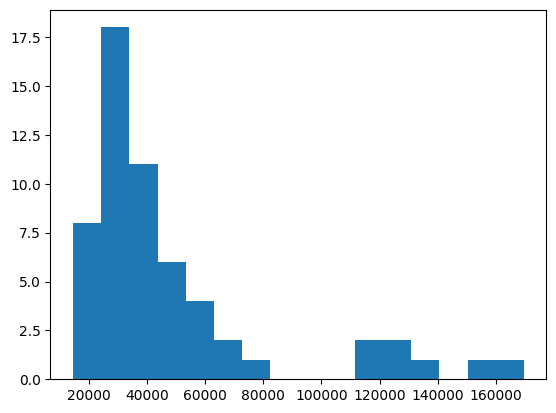

In [64]:
plt.hist(mean_prices,bins=16)

In [50]:
data_subset = data_train[data_train['brand'] == "Mazda"]
data_subset.mean(numeric_only=True)['price']

25332.82861346083

In [85]:
data_subset = data_train[data_train['brand'] == "Audi"]
data_subset
# for i in data_subset.model.unique():
#     print(i)
data_subset.model.value_counts()

model
Q5 2.0T Premium Plus         626
S4 3.0T Premium Plus         606
Q5 S line Premium Plus       552
A5 2.0T Premium Plus         506
A4 2.0T Premium              503
                            ... 
GL-Class GL 550 4MATIC         1
Romeo Giulia Quadrifoglio      1
AMG GT 53 Base                 1
Xterra S                       1
S60 T6 Momentum                1
Name: count, Length: 183, dtype: int64

In [15]:
data_train.isnull().sum()

id                  0
brand               0
model               0
model_year          0
milage              0
fuel_type        5083
engine              0
transmission        0
ext_col             0
int_col             0
accident         2452
clean_title     21419
price               0
dtype: int64

In [91]:
data_train.fuel_type.value_counts()

fuel_type
Gasoline          165940
Hybrid              6832
E85 Flex Fuel       5406
Diesel              3955
–                    781
Plug-In Hybrid       521
not supported         15
Name: count, dtype: int64